# dataset and text processing preparation

In [1]:
import joblib
import timeit
start = timeit.default_timer()
bookcorpus = joblib.load('C:\\Users\\Saeth\\Downloads\\bookcorpusV2')
stop = timeit.default_timer()
print('time load corpus (Sec): ', stop-start)

time load corpus (Sec):  123.4003222


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import tagset_mapping, map_tag

In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [4]:
# function to count word frequency
text = "They refuse to permit us to obtain the refuse permit."

def freq_dict(word_dict, sentence):
    tokens = gensim.utils.simple_preprocess(sentence, min_len=2)
    pos = nltk.pos_tag(tokens)
    for word_index in range(len(tokens)):
        word_pos = map_tag('en-ptb', 'universal',pos[word_index][1])
        if tokens[word_index] in gensim.parsing.preprocessing.STOPWORDS:
            word_stop = 'STOP'
        else:
            word_stop = 'NON_STOP'
        if (tokens[word_index], word_pos, word_stop) not in word_dict.keys():
            word_dict[(tokens[word_index], word_pos, word_stop)] = [1]
        else:
            word_dict[(tokens[word_index], word_pos, word_stop)][0]+=1
    

word_dict=dict()
freq_dict(word_dict, text)
word_dict

{('they', 'PRP', 'STOP'): [1],
 ('refuse', 'VBP', 'NON_STOP'): [1],
 ('to', 'TO', 'STOP'): [2],
 ('permit', 'VB', 'NON_STOP'): [1],
 ('us', 'PRP', 'STOP'): [1],
 ('obtain', 'VB', 'NON_STOP'): [1],
 ('the', 'DT', 'STOP'): [1],
 ('refuse', 'NN', 'NON_STOP'): [1],
 ('permit', 'NN', 'NON_STOP'): [1]}

In [9]:
# record all word frequencies
record = dict()
start = timeit.default_timer()
iteration = 0
for sentence in bookcorpus:
    iteration+=1
    freq_dict(record, sentence)
    if iteration%10000000==0:
        stop = timeit.default_timer()
        print('iteration: ', iteration, '// time (Sec): ', stop - start)
        start = timeit.default_timer()

start = timeit.default_timer()
joblib.dump(record, 'C:\\Users\\Saeth\\Downloads\\freqDictAutoSaveV4')
stop = timeit.default_timer()
print('Time save dict (Sec): ', stop - start)

iteration:  10000000 // time (Sec):  6620.4043824
iteration:  20000000 // time (Sec):  6689.5770227
iteration:  30000000 // time (Sec):  6265.850732700001
iteration:  40000000 // time (Sec):  6395.430776199999
iteration:  50000000 // time (Sec):  6287.255538199999
iteration:  60000000 // time (Sec):  6728.397085100005
iteration:  70000000 // time (Sec):  6510.2343397
Time save dict (Sec):  27.662637900000846


In [10]:
# top 10 non-stop words
t = sorted(record.items(), key=lambda x:-x[1][0])
[i for i in t if i[0][2]=='NON_STOP'][:10]

[(('said', 'VBD', 'NON_STOP'), [3399860]),
 (('like', 'IN', 'NON_STOP'), [2398412]),
 (('time', 'NN', 'NON_STOP'), [1628590]),
 (('eyes', 'NNS', 'NON_STOP'), [1566876]),
 (('way', 'NN', 'NON_STOP'), [1258175]),
 (('going', 'VBG', 'NON_STOP'), [1249553]),
 (('know', 'VB', 'NON_STOP'), [1242075]),
 (('head', 'NN', 'NON_STOP'), [1197304]),
 (('hand', 'NN', 'NON_STOP'), [1128383]),
 (('looked', 'VBD', 'NON_STOP'), [1031478])]

In [18]:
# top 10 stop words
[i for i in t if i[0][2]=='STOP'][:10]

[(('the', 'DET', 'STOP'), [82592]),
 (('be', 'VERB', 'STOP'), [50339]),
 (('and', 'CONJ', 'STOP'), [41367]),
 (('to', 'PRT', 'STOP'), [40549]),
 (('of', 'ADP', 'STOP'), [29833]),
 (('he', 'PRON', 'STOP'), [20887]),
 (('in', 'ADP', 'STOP'), [20505]),
 (('have', 'VERB', 'STOP'), [19695]),
 (('it', 'PRON', 'STOP'), [19175]),
 (('his', 'PRON', 'STOP'), [14287])]

In [57]:
# max, min, and average word frequency
import statistics
lol = [np.log2(i[1][0]) for i in t]
max_freq = max(lol)
min_freq = min(lol)
avg_freq = math.ceil(sum(lol)/len(lol))
print('max_freq', max_freq)
print('min_freq', min_freq)
print('avg_freq', avg_freq)
print('SD', statistics.stdev(lol, avg_freq))
print('unique: ', len(lol))
print('total freq', sum(lol))

max_freq 25.190680241521164
min_freq 0.0
avg_freq 3
SD 2.8023786535186384
unique:  1237123
total freq 2726015.496018165


# word distribution plot

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [20]:
# plot all words
def all_word_plot(t, log2):
    figure(figsize=(8, 6), dpi=80)
    if log2 == True:
        top_freq = [(g, np.log2(h[0]))[1] for (g, h) in t]
        plt.title('words frequency (log 2)')
    else:
        top_freq = [i[1][0] for i in t][:200]
        plt.title('top 200 words frequency')
    plt.bar([k for k in range(len(top_freq))], top_freq)
    plt.show()

In [28]:
# plot stop or non-stop words
def stop_plot(t, log2, stop):
    figure(figsize=(8, 6), dpi=80)
    if log2 == True:
        if stop == True:
            top_freq = [(g, np.log2(h[0]))[1] for (g, h) in t if g[2]=='STOP']
            plt.title('stop words frequency (log 2)')
        else:
            top_freq = [(g, np.log2(h[0]))[1] for (g, h) in t if g[2]=='NON_STOP']
            plt.title('non-stop words frequency (log 2)')
    else:
        if stop == True:
            top_freq = [i[1][0] for i in t if i[0][2]=='STOP'][:200]
            plt.title('top 200 stop words frequency')
        else:
            top_freq = [i[1][0] for i in t if i[0][2]=='NON_STOP'][:200]
            plt.title('top 200 non-stop words frequency')
    plt.bar([k for k in range(len(top_freq))], top_freq)
    plt.show()

In [29]:
# pos tag bar plot
def word_type_distribution(t, log2):
    figure(figsize=(8, 6), dpi=80)
    pos_tag = sorted(list(set([i[0][1] for i in t])))
    stop=[]
    non_stop=[]
    if log2 == False:
        for j in range(len(pos_tag)):
            stop.append(sum([i[1][0] for i in t if (i[0][2]=='STOP') and (i[0][1]==pos_tag[j])]))
            non_stop.append(sum([i[1][0] for i in t if (i[0][2]=='NON_STOP') and (i[0][1]==pos_tag[j])]))
    else:
        new_t = [(g, np.log2(h[0])) for (g, h) in t]
        for j in range(len(pos_tag)):
            stop.append(sum([i[1] for i in new_t if (i[0][2]=='STOP') and (i[0][1]==pos_tag[j])]))
            non_stop.append(sum([i[1] for i in new_t if (i[0][2]=='NON_STOP') and (i[0][1]==pos_tag[j])]))
    data=[stop, non_stop]

    N = 2
    ind = np.arange(N) 
    width = 0.05
    for h in range(len(stop)):
        plt.bar(ind + h*width, [stop[h], non_stop[h]], width, label=pos_tag[h])

    plt.ylabel('frequency')
    if log2 == False:
        plt.title('words type distribution')
    else:
        plt.title('words type distribution (log2)')

    plt.xticks(ind + len(pos_tag)*width/2, ('Stop word', 'Non-stop word'))
    plt.legend(loc='best')
    plt.show()

In [49]:
# pos tag distribution plot
def all_distribution(t, log2, typ):
    pos_tag = sorted(list(set([i[0][1] for i in t])))
    figure(figsize=(18, 50), dpi=80)
    if log2 == False:
        for tag in range(len(pos_tag)):
            plt.subplot(4, 3, tag+1)
            data = [i[1][0] for i in t if (i[0][2]==typ) and (i[0][1]==pos_tag[tag])][:100]
            plt.bar([k for k in range(len(data))], data)
            plt.title('Top 100 ' + typ + ' words frequency' + ' (' + pos_tag[tag] + ')')
    else:
        new_t = [(g, np.log2(h[0])) for (g, h) in t]
        for tag in range(len(pos_tag)):
            plt.subplot(13, 3, tag+1)
            data = [i[1] for i in new_t if (i[0][2]==typ) and (i[0][1]==pos_tag[tag])]
            plt.bar([k for k in range(len(data))], data)
            plt.title('log2 ' + typ + ' words' + ' (' + pos_tag[tag] + ')')
    plt.show()

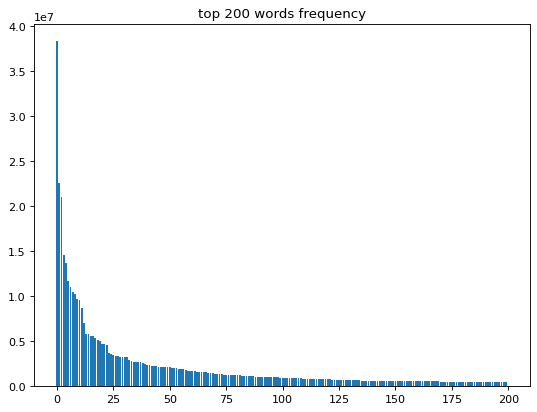

In [16]:
# top 200 words
all_word_plot(t, False)

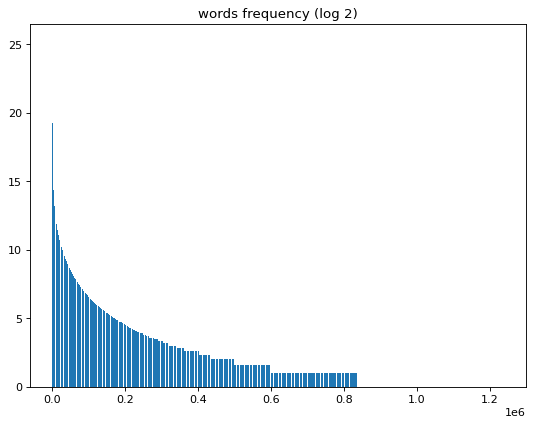

In [17]:
# top log2 words
all_word_plot(t, True)

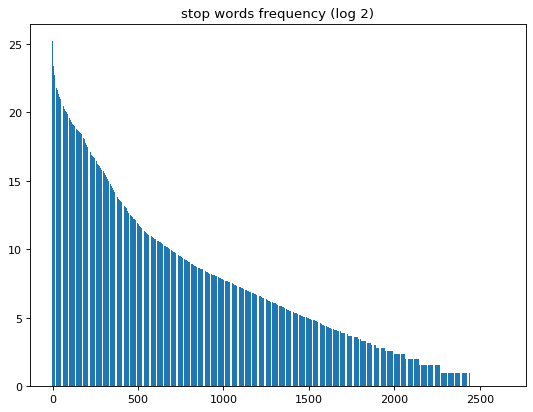

In [30]:
# top log2 stop words
stop_plot(t, True, True)

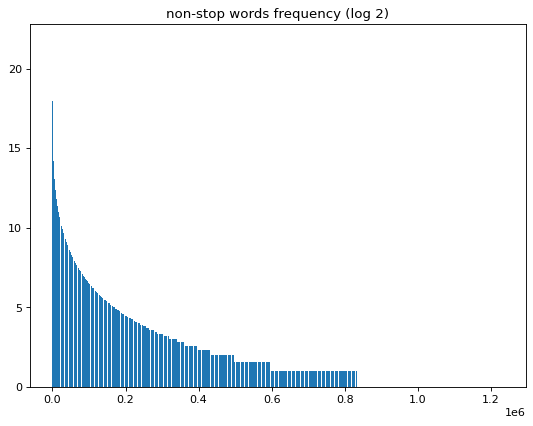

In [31]:
# top log2 non-stop words
stop_plot(t, True, False)

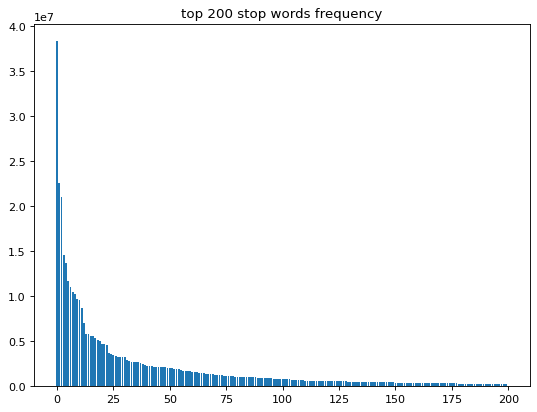

In [32]:
# top 200 stop words
stop_plot(t, False, True)

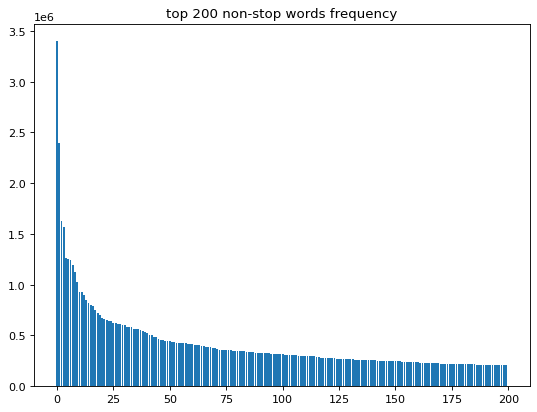

In [33]:
# top 200 non-stop words
stop_plot(t, False, False)

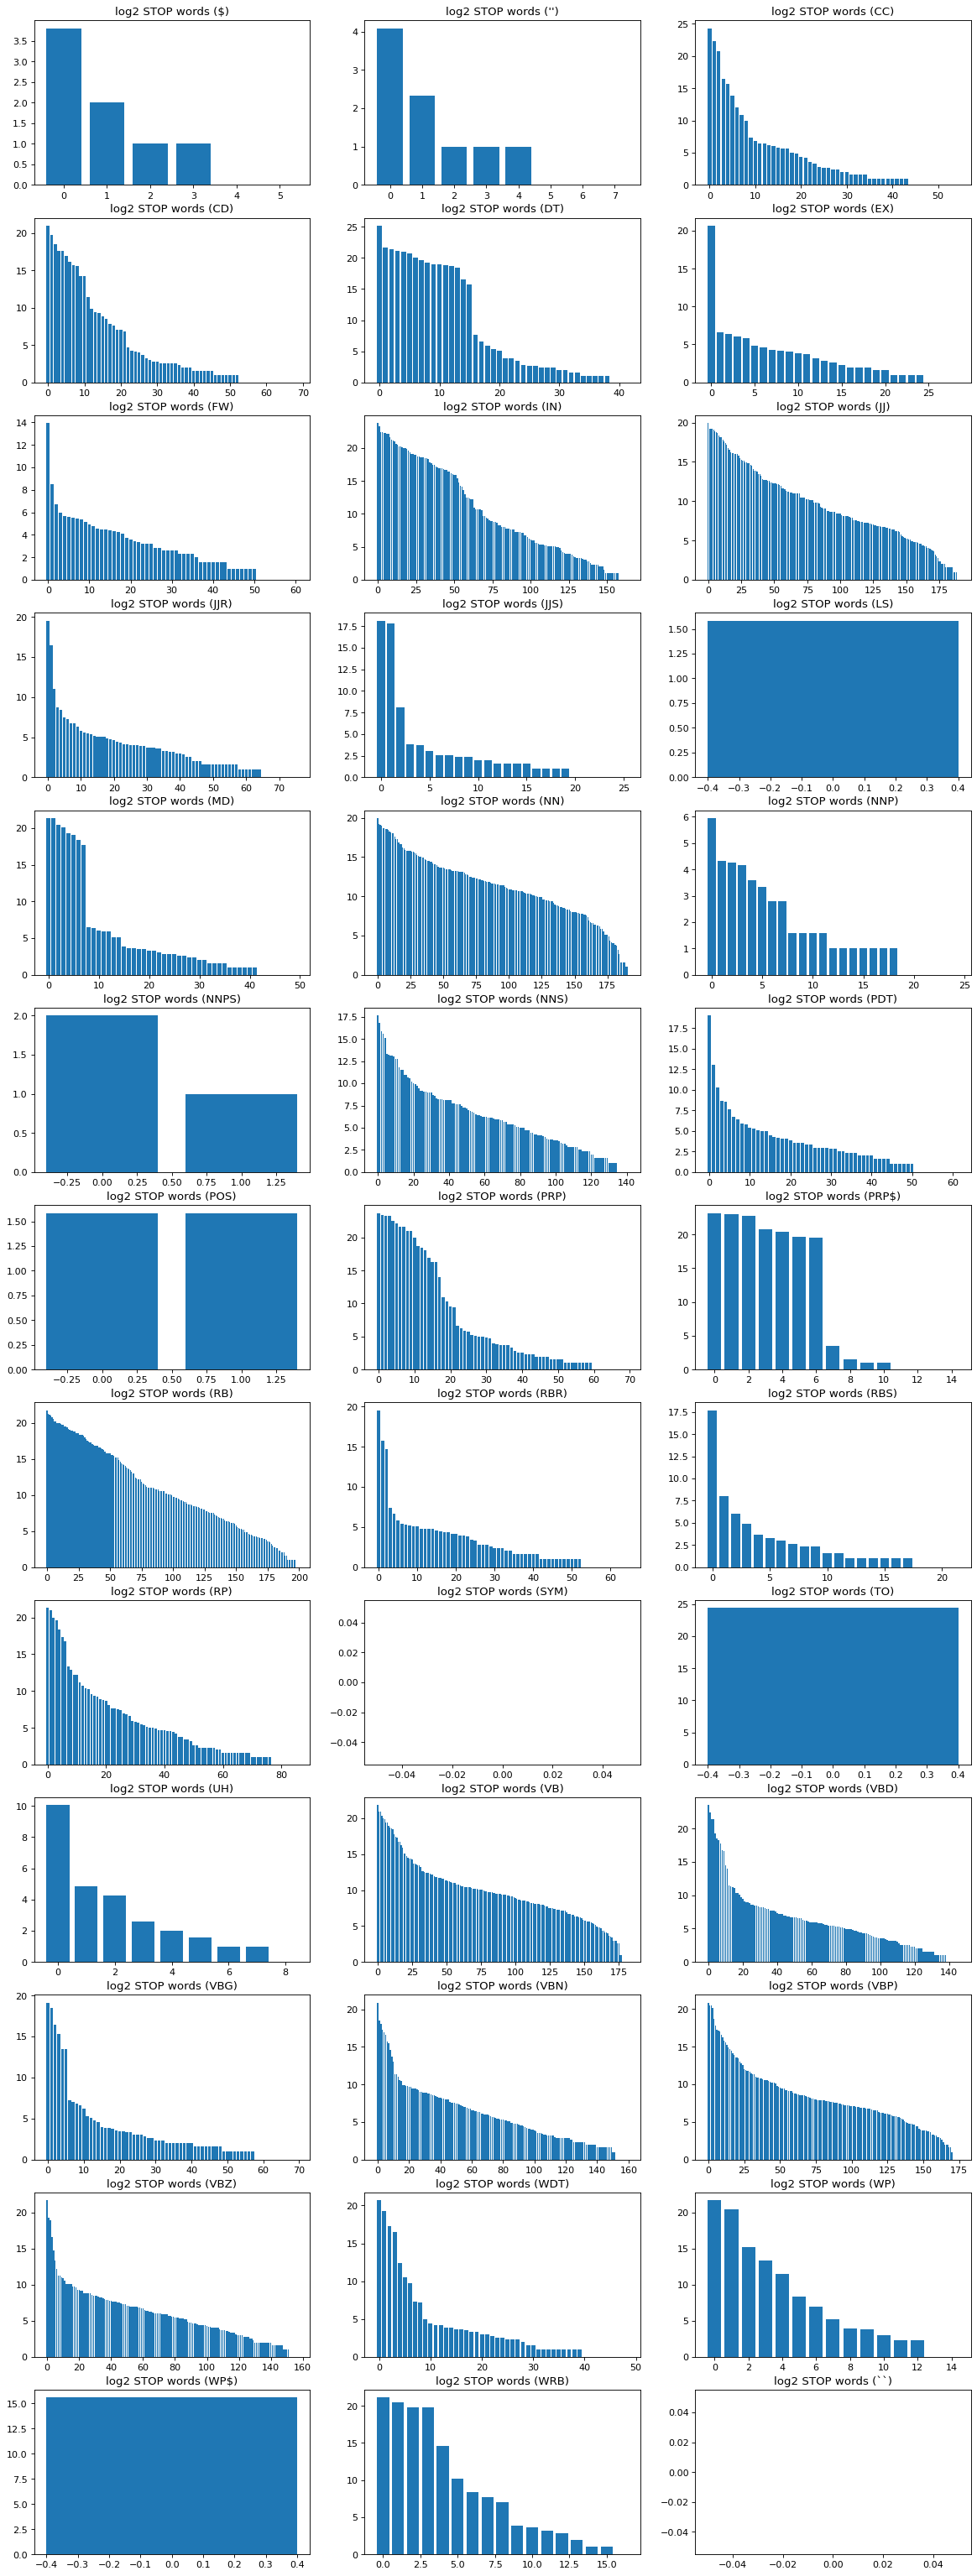

In [50]:
# pos distribution of stop words
all_distribution(t, True, 'STOP')

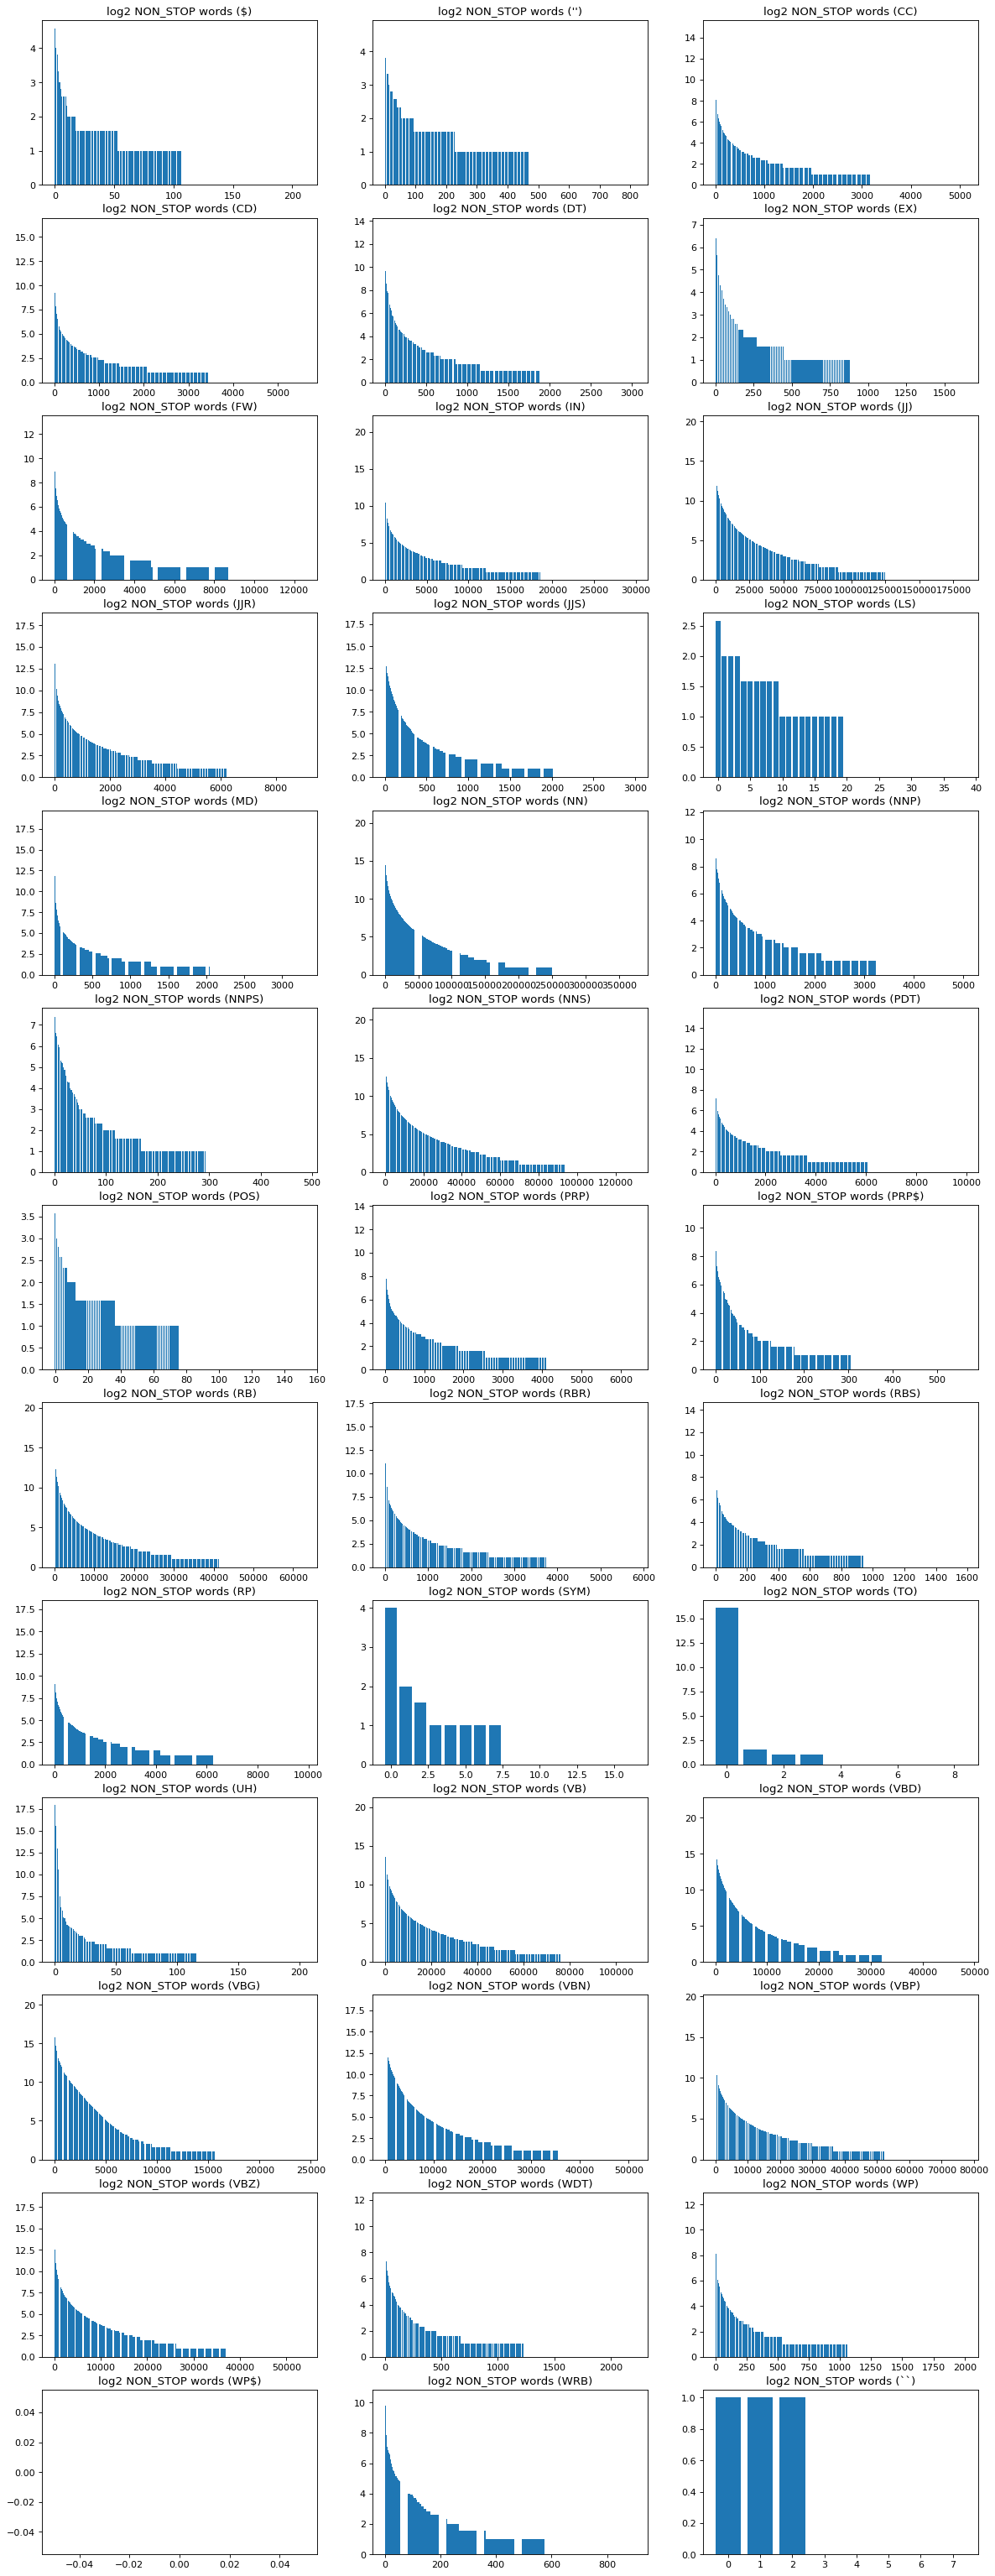

In [51]:
# pos distribution of non-stop words
all_distribution(t, True, 'NON_STOP')

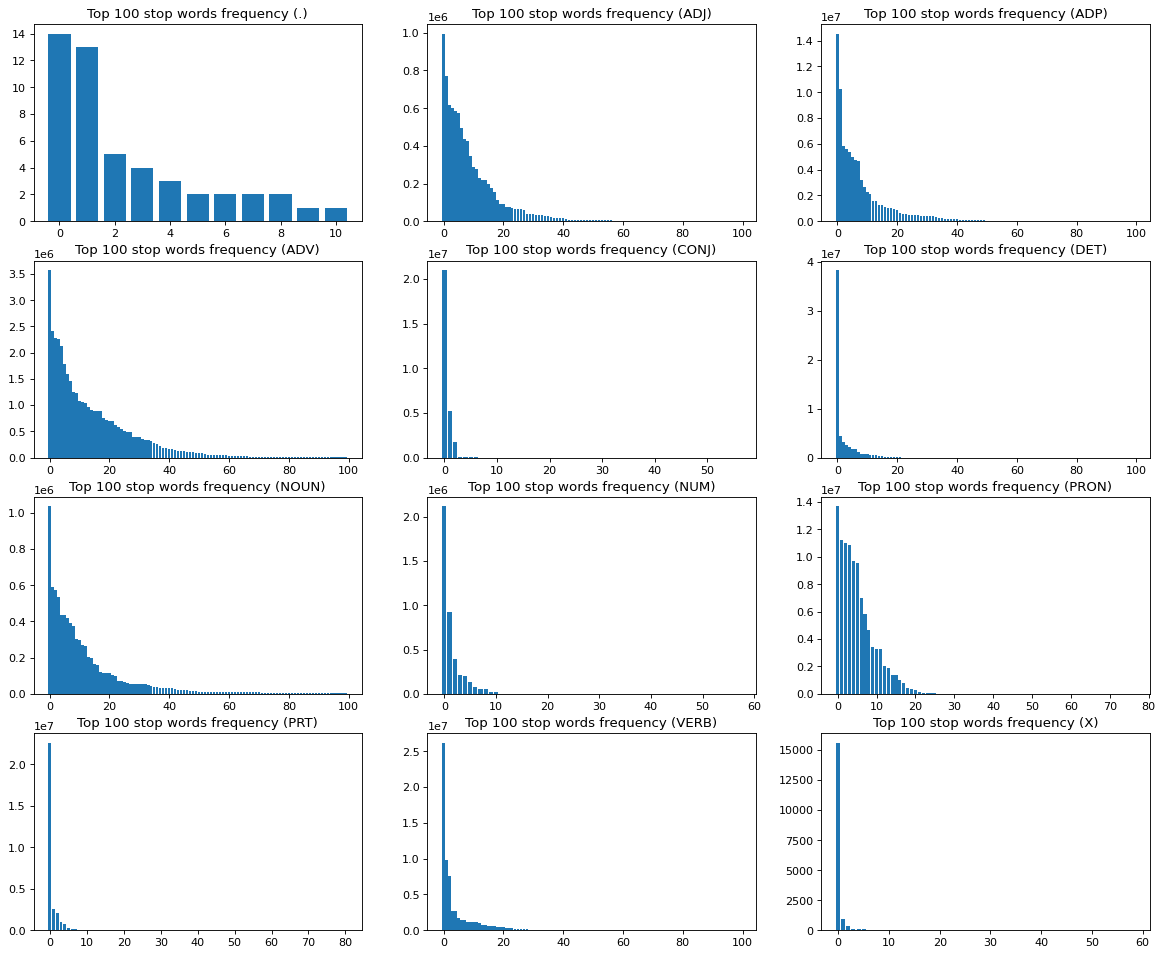

In [152]:
# log2 pos distribution of stop words
all_distribution(t, False, 'STOP')

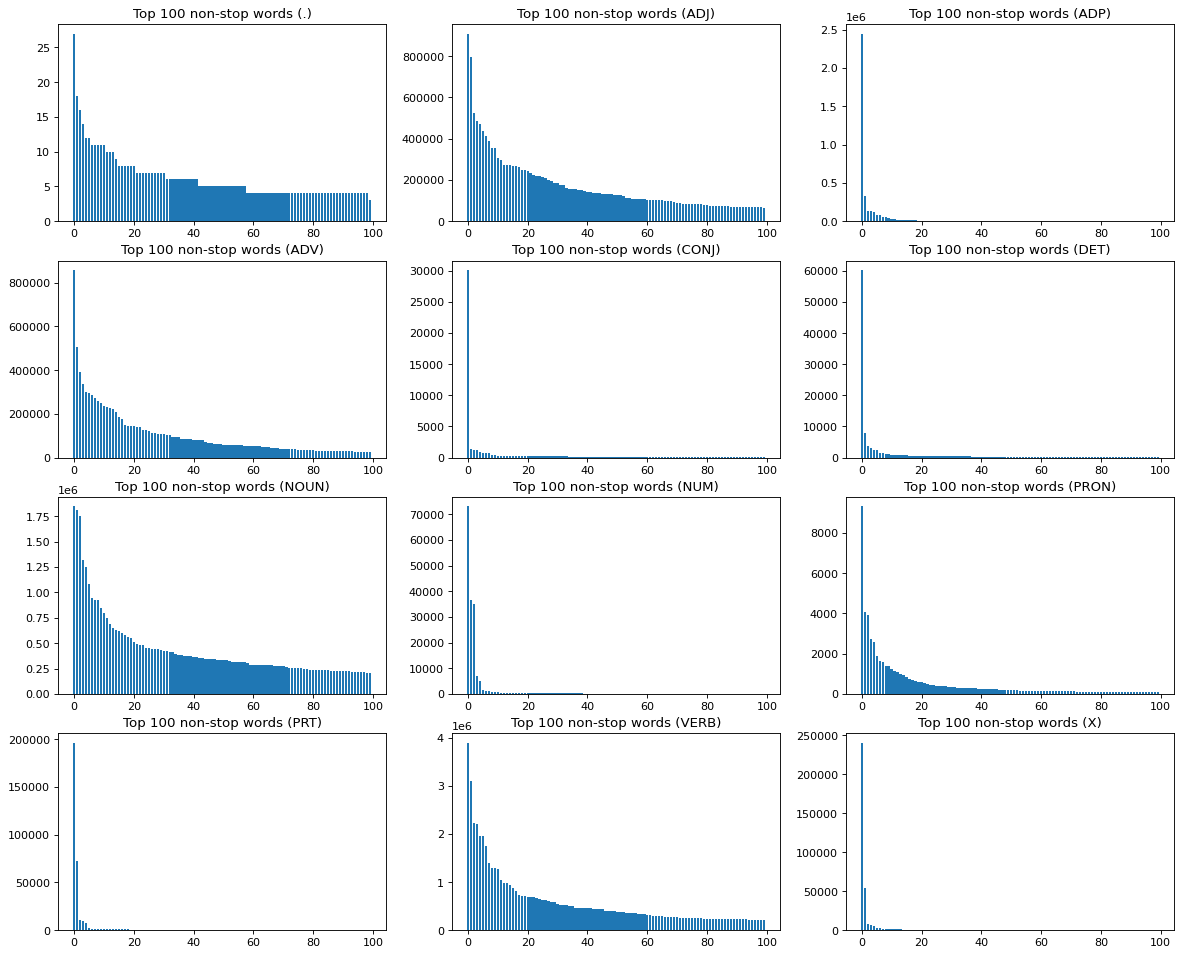

In [153]:
# log2 pos distribution of non-stop words
all_distribution(t, False, 'NON_STOP')

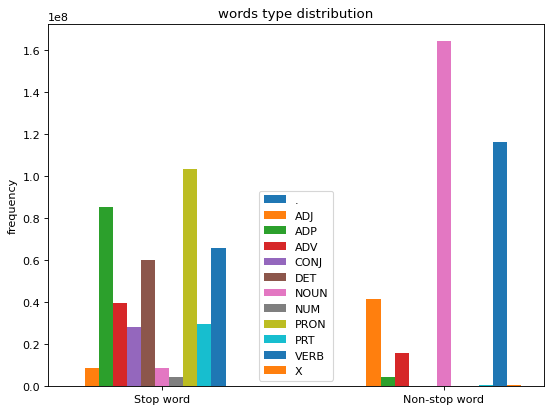

In [184]:
# pos bar plot
word_type_distribution(t, False)

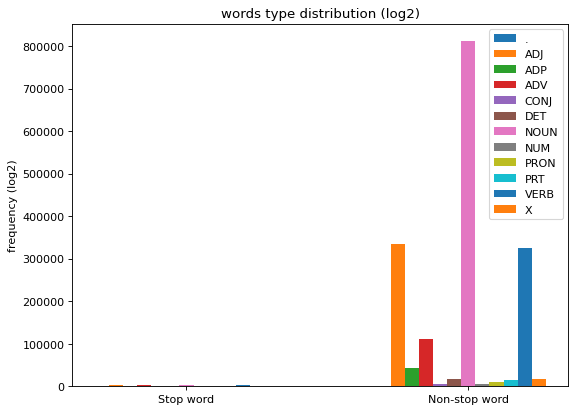

In [194]:
# log2 pos bar plot
word_type_distribution(t, True)

In [161]:
# top pos tag
pos_tag = sorted(list(set([i[0][1] for i in t])))
dict_stop = dict()
dict_non_stop = dict()
for i in range(len(pos_tag)):
    dict_stop[pos_tag[i]] = stop[i]
    dict_non_stop[pos_tag[i]] = non_stop[i]
sorted(dict_stop.items(), key=lambda x:-x[1])

[('PRON', 103245643),
 ('ADP', 85236680),
 ('VERB', 66025667),
 ('DET', 60100361),
 ('ADV', 39583310),
 ('PRT', 29641958),
 ('CONJ', 28033404),
 ('ADJ', 8895291),
 ('NOUN', 8809510),
 ('NUM', 4190117),
 ('X', 17735),
 ('.', 49)]

In [195]:
# top log2 pos tag
pos_tag = sorted(list(set([i[0][1] for i in t])))
dict_stop_log = dict()
dict_non_stop_log = dict()
for i in range(len(pos_tag)):
    dict_stop_log[pos_tag[i]] = stop[i]
    dict_non_stop_log[pos_tag[i]] = non_stop[i]
sorted(dict_stop_log.items(), key=lambda x:-x[1])

[('NOUN', 2152.8329393351373),
 ('ADV', 2133.6173382455163),
 ('VERB', 2066.347967632122),
 ('ADJ', 1729.0696436116639),
 ('ADP', 1615.365080430677),
 ('DET', 730.7498210683548),
 ('PRON', 715.1202943912318),
 ('PRT', 504.46815392468517),
 ('NUM', 344.81996910393974),
 ('CONJ', 263.94315484078106),
 ('X', 185.0975582788378),
 ('.', 17.414685235807212)]

In [162]:
sorted(dict_non_stop.items(), key=lambda x:-x[1])

[('NOUN', 164396465),
 ('VERB', 116511999),
 ('ADJ', 41453613),
 ('ADV', 15927807),
 ('ADP', 4213505),
 ('X', 424238),
 ('PRT', 401382),
 ('NUM', 191563),
 ('DET', 179279),
 ('PRON', 88673),
 ('CONJ', 68365),
 ('.', 1921)]

<BarContainer object of 12 artists>

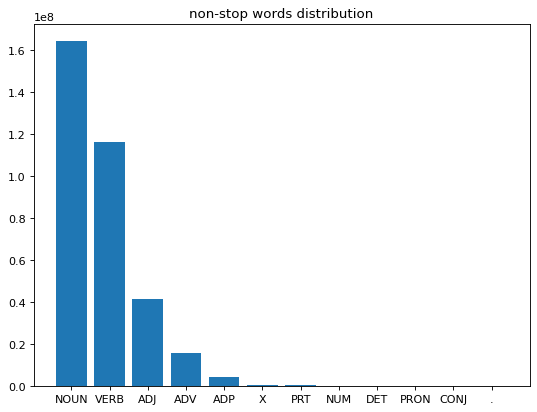

In [188]:
# word type distribution for non-stop words
figure(figsize=(8, 6), dpi=80)
data =sorted(dict_non_stop.items(), key=lambda x:-x[1])
plt.title('non-stop words distribution')
plt.bar([i[0] for i in data], [i[1] for i in data])

<BarContainer object of 12 artists>

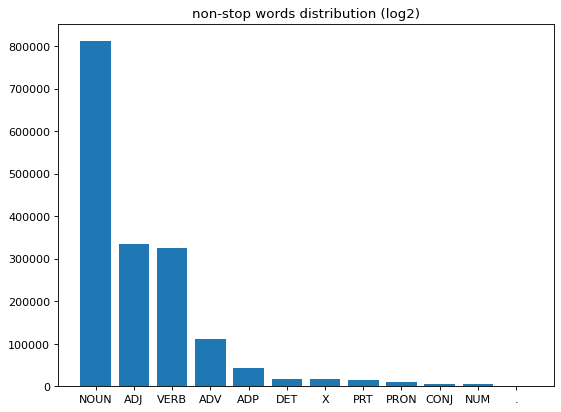

In [192]:
# word type distribution for non-stop words (log2)
figure(figsize=(8, 6), dpi=80)
data =sorted(dict_non_stop_log.items(), key=lambda x:-x[1])
plt.title('non-stop words distribution (log2)')
plt.bar([i[0] for i in data], [i[1] for i in data])

<BarContainer object of 12 artists>

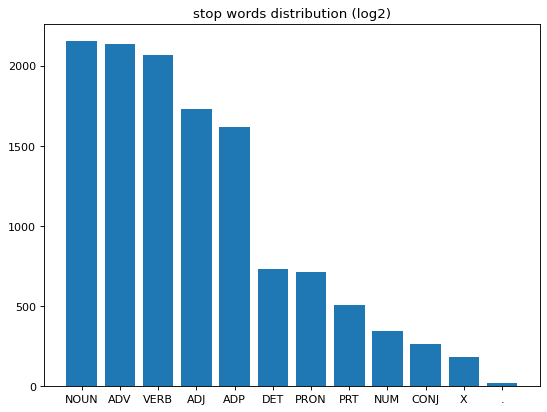

In [193]:
# word type distribution for stop words (log2)
figure(figsize=(8, 6), dpi=80)
data =sorted(dict_stop_log.items(), key=lambda x:-x[1])
plt.title('stop words distribution (log2)')
plt.bar([i[0] for i in data], [i[1] for i in data])

<BarContainer object of 12 artists>

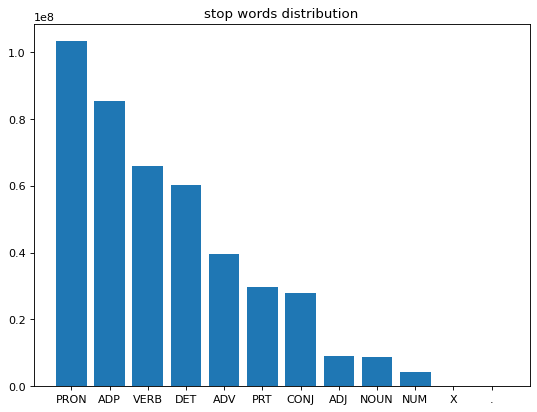

In [189]:
# word type distribution for stop words
figure(figsize=(8, 6), dpi=80)
data =sorted(dict_stop.items(), key=lambda x:-x[1])
plt.title('stop words distribution')
plt.bar([i[0] for i in data], [i[1] for i in data])

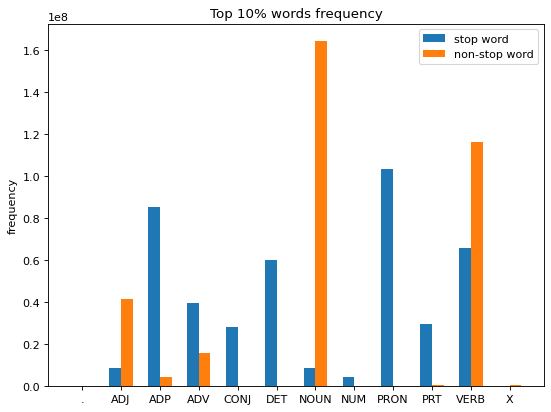

In [155]:
# stop and non-stop words bar plot
figure(figsize=(8, 6), dpi=80)
pos_tag = sorted(list(set([i[0][1] for i in top10])))
stop=[]
non_stop=[]
for j in range(len(pos_tag)):
    stop.append(sum([i[1][0] for i in t if (i[0][2]=='STOP') and (i[0][1]==pos_tag[j])]))
    non_stop.append(sum([i[1][0] for i in t if (i[0][2]=='NON_STOP') and (i[0][1]==pos_tag[j])]))
data=[stop, non_stop]

N = len(pos_tag)
ind = np.arange(N) 
width = 0.3
plt.bar(ind , stop, width, label='stop word')
plt.bar(ind + width, non_stop, width, label='non-stop word')

plt.ylabel('frequency')
plt.title('Top 10% words frequency')

plt.xticks(ind + width/2, pos_tag)
plt.legend(loc='best')
plt.show()